<a href="https://colab.research.google.com/github/Betson1/MachineLearning/blob/main/%D0%A7%D0%B5%D1%82%D0%B2%D0%B5%D1%80%D1%82%D0%B0%D1%8F_%D0%BB%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка данных для кластеризации

In [ ]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

auction = pd.read_csv('/content/drive/MyDrive/auction_verification.csv')

auction.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667


In [ ]:
vals = auction["verification.result"].unique()
vals

array([False,  True])

Сохраняем копию данных

In [ ]:
auction_copy = auction.copy()
auction_copy.head()


,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667


Удаляем целевую переменную

In [ ]:
auction = auction.drop(columns=['verification.result'])
auction.head()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.time
0,0,0,2,1,59,1,0,163.316667
1,0,0,2,1,59,2,0,200.860000
2,0,0,2,1,59,4,0,154.888889
3,0,0,2,1,59,6,0,108.640000
4,0,0,2,1,60,1,0,85.466667


In [ ]:
X = auction
y = auction_copy["verification.result"].replace(vals, [0, 1])
yvals = auction_copy["verification.result"]

<ipython-input-29-e19704f87946>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = auction_copy["verification.result"].replace(vals, [0, 1])


# Класстеризация K-Means

In [ ]:
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans

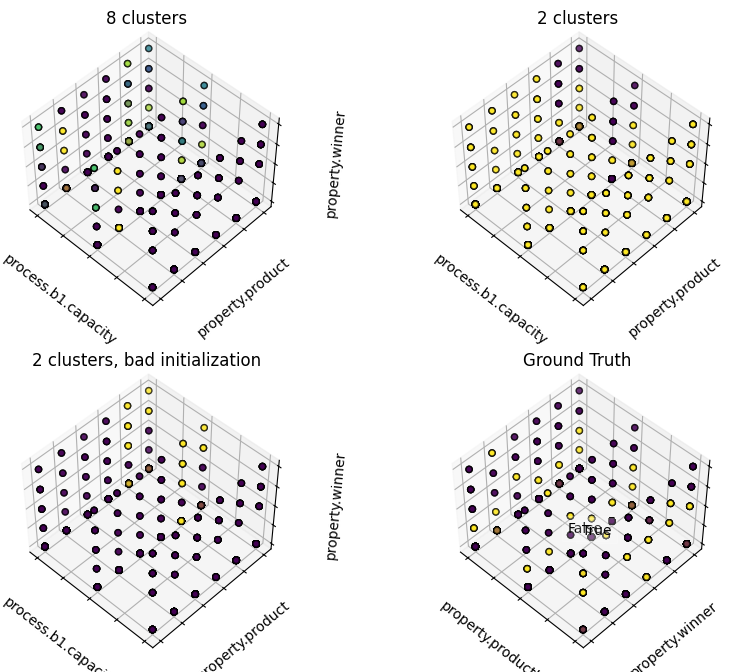

In [ ]:
estimators = [
    ("k_means_8", KMeans(n_clusters=8)),
    ("k_means_2", KMeans(n_clusters=2)),
    ("k_means_bad_init", KMeans(n_clusters=2, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "2 clusters", "2 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X["process.b1.capacity"], X["property.product"], X["property.winner"], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("process.b1.capacity")
    ax.set_ylabel("property.product")
    ax.set_zlabel("property.winner")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [(vals[0], 0), (vals[1], 1)]:
    ds = auction_copy[auction_copy["verification.result"]==name]
    ax.text3D(
        ds["process.b1.capacity"].mean(),
        ds["property.product"].mean(),
        ds["property.winner"].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X["process.b1.capacity"], X["property.product"], X["property.winner"], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("property.producth")
ax.set_ylabel("property.winner")
ax.set_zlabel("process.b1.capacity")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

## Определение метрик

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

In [ ]:
# Предположим, что labels - это метки кластеров, полученные с помощью KMeans
# y - это истинные метки (Ground Truth)

ari = adjusted_rand_score(y, labels)
nmi = normalized_mutual_info_score(y, labels)

print(f"Adjusted Rand Index: {ari}")
print(f"Normalized Mutual Information: {nmi}")

Adjusted Rand Index: -0.09979151473477807
Normalized Mutual Information: 0.07336591990211073


In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Выберите один из ваших estimators, например:
est = KMeans(n_clusters=2)
est.fit(X)
labels = est.labels_

ari = adjusted_rand_score(y, labels)
nmi = normalized_mutual_info_score(y, labels)

print(f"Adjusted Rand Index: {ari}")
print(f"Normalized Mutual Information: {nmi}")

Adjusted Rand Index: -0.09979151473477807
Normalized Mutual Information: 0.07336591990211073


In [ ]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score


n_clusters = np.arange(2, 21)

In [ ]:
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n

In [ ]:
best_metric

[0, 10000, 0, []]

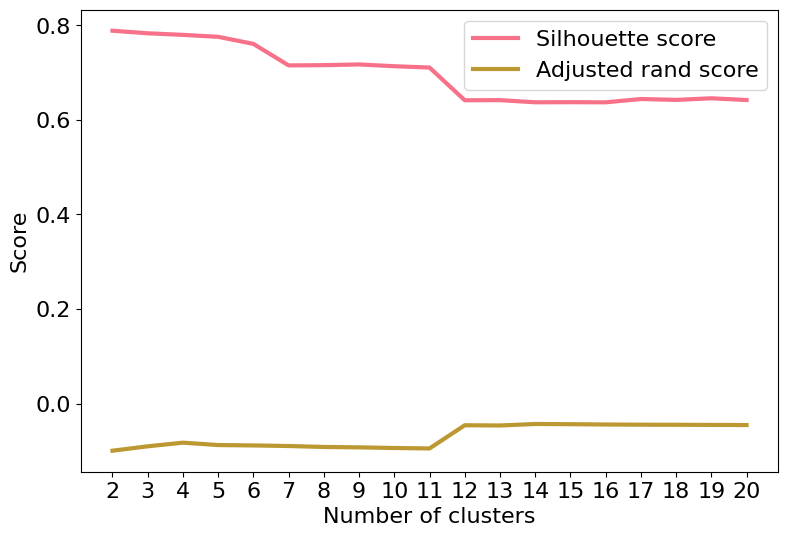

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()

# Иерархическая кластеризация


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

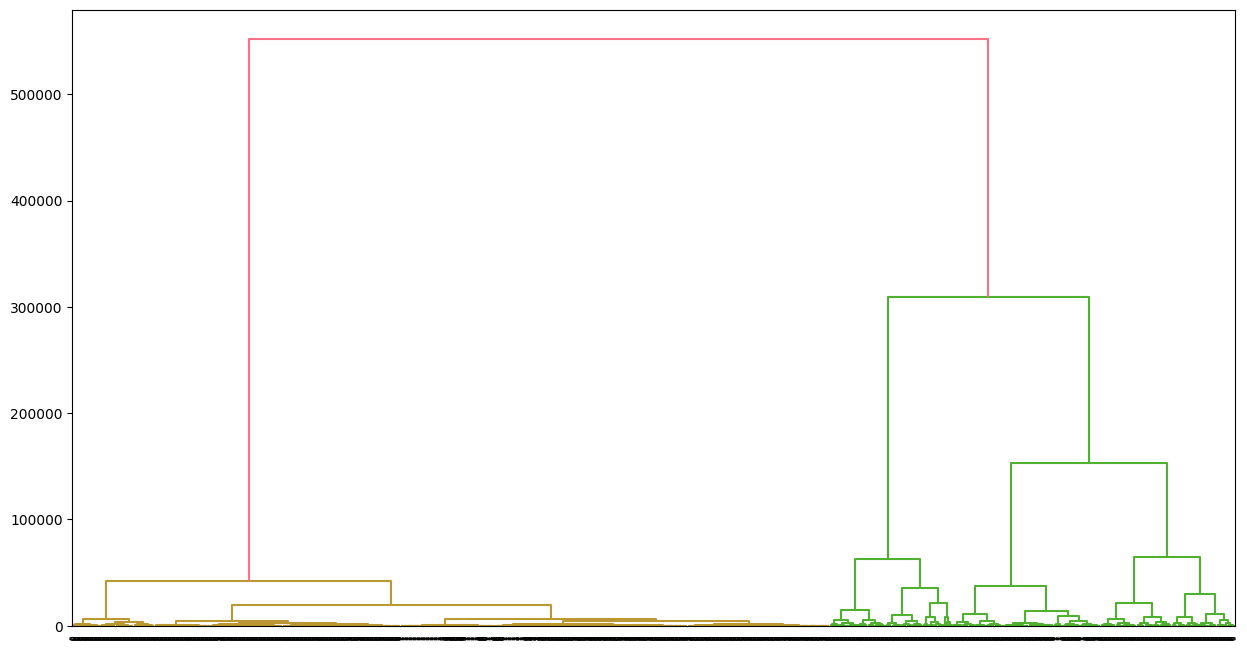

In [ ]:
samples = auction.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')


plt.figure(figsize=(15, 8))
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [ ]:
mins = X.shape[1]
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
X = X[~((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))).any(axis=1)]

['y', 'b', 'g', 'r']


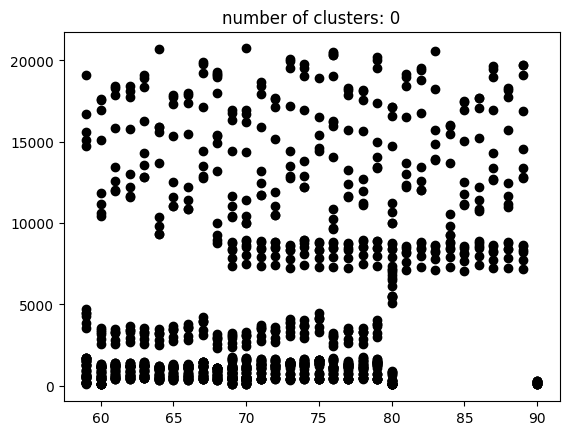

In [ ]:
db = DBSCAN(eps=0.0000000000001, min_samples=2).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["property.price"], xy["verification.time"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["property.price"], xy["verification.time"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


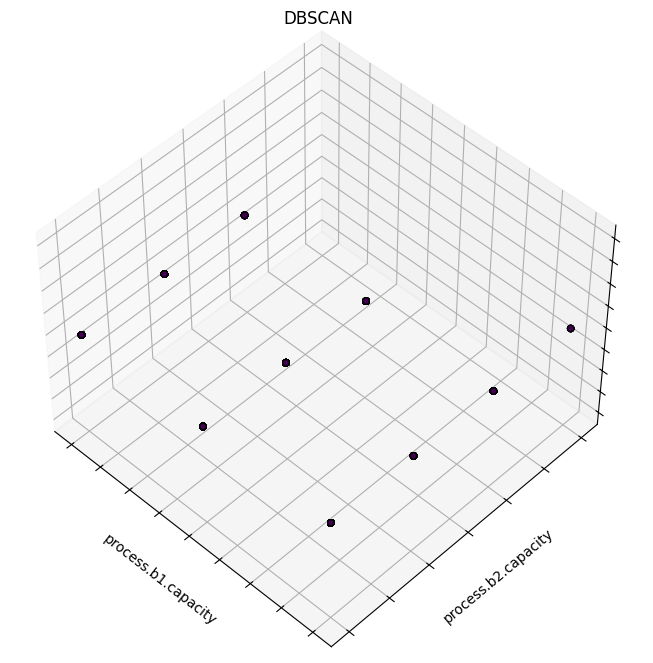

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

ax.scatter(X["process.b1.capacity"], X["process.b2.capacity"], X["process.b3.capacity"], c=labels.astype(float), edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("process.b1.capacity")
ax.set_ylabel("process.b2.capacity")
ax.set_zlabel("process.b3.capacity")
ax.set_title("DBSCAN")

plt.show()

In [ ]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)